# Task 1

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].



def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        return np.random.uniform(mu-sigma/math.sqrt(3), mu+sigma/math.sqrt(3), n)
        pass
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
#y_test = generate_random_numbers(5, 0, 0.1, "normal")

In [3]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")

In [4]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task1(y):
    x=0
    n = len(y)
    history = []
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    for i,idx in enumerate(ordering):
        grad = x-y[idx]
        x -= 1/(i+1)*grad
        loss = 0.5*np.sum((x-y)**2)
        history.append(loss)
    return x, history


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y):
    x = 0
    n = len(y)
    history = []
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    for i,idx in enumerate(ordering):
        grad = x-y[idx]
        x -= 1/(i+1)*grad
        loss = 0.5*np.sum((x-y)**2)
        history.append(loss)
    return x, history

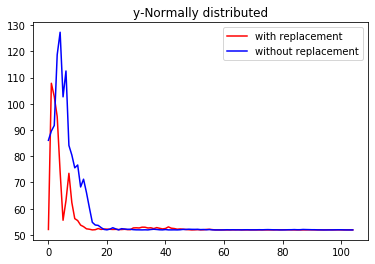

In [5]:
plt.plot(IGD_wr_task1(y1)[1],color='red')
plt.plot(IGD_wo_task1(y1)[1],color='blue')
plt.legend(['with replacement','without replacement'])
plt.title('y-Normally distributed')
plt.show()

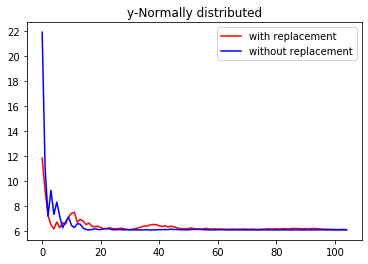

In [6]:
plt.plot(IGD_wr_task1(y2)[1],color='red')
plt.plot(IGD_wo_task1(y2)[1],color='blue')
plt.legend(['with replacement','without replacement'])
plt.title('y-Normally distributed')
plt.show()

Without replacement is better for both the uniform and the normally distributed y-values

### Brief Proof as for why IGD (without replacement) must converge to mean value of y
Testing a few numbers:  
$x_1 = x_0 -  γ_k(x_0-y_{i1}) = \frac{y_{i1}}{2}$  
  
$x_2 = \frac{y_{i1}}{2} - \frac{y_{i1}}{6} + \frac{y_{i2}}{3} = \frac{y_{i1} + y_{i2}}{3}$
  
 
$x_3 = \frac{y_{i1} + y_{i2}}{3} - \frac{y_{i1} + y_{i2}}{12} + \frac{y_{i3}}{4}= \frac{y_{i1} + y_{i2} + y_{i3}}{4}$  
  
From this, we can see a pattern.  
$x_m = \sum_{k=1}^m \frac{y_{ik}}{m+1}$  
We've shown the base cases, now we inductively prove that claim. First, assume the pattern holds for m. Thus, 
  
$x_{m+1} = \sum_{k=1}^m \frac{y_{ik}}{m+1} - \sum_{k=1}^m \frac{y_{ik}}{(m+1)(m+2)} + \frac{y_{i(m+1)}}{m+2} = \sum_{k=1}^m \frac{y_{ik}}{m+2} + \frac{y_{i(m+1)}}{m+2} = \sum_{k=1}^{m+1} \frac{y_{ik}}{m+1}$  
  
Thus the pattern holds true for m+1, so the claim is proven
  
We note that as m approaches infinity (or length(y) in this case), the sum approaches the mean value of y, so IGD converges to the mean of y

## Task 2

In [7]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task2(beta, y):
    x=0
    n = len(beta)
    history = []
    gamma = 0.05*np.min(1/beta)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    for i,idx in enumerate(ordering):
        grad = beta[idx]*(x-y)
        x -= gamma*grad
        loss = 0.5*np.sum(beta*(x-y)**2)
        history.append(loss)
    return x, history


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task2(beta, y):
    x=0
    n = len(beta)
    history = []
    gamma = 0.05*np.min(1/beta)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    for i,idx in enumerate(ordering):
        grad = beta[idx]*(x-y)
        x -= gamma*grad
        loss = 0.5*np.sum(beta*(x-y)**2)
        history.append(loss)
    return x, history

In [8]:
y = np.random.rand(1) #just choosing a random small scalar
beta = np.random.uniform(1,2,105) #getting the uniformly distributed weights

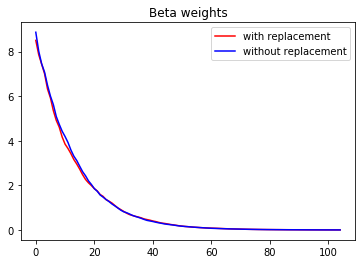

In [9]:
plt.plot(IGD_wr_task2(beta,y)[1],color='red')
plt.plot(IGD_wo_task2(beta,y)[1],color='blue')
plt.legend(['with replacement','without replacement'])
plt.title('Beta weights')
plt.show()

Without replacement is marginally better

## Task 3

In [10]:
def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [11]:
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [12]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    gamma = 1e-3
    x = np.zeros(A.shape[1])
    n = A.shape[0]
    norm = []
    history = []
    ordering = np.random.choice(n, n, replace=True) 
    for i in ordering:
        grad = A[i,:]*(A[i,:]@x - y[i])
        x -= gamma*grad
        loss = np.sum((A@x-y)**2)
        history.append(loss)
        norm.append(np.linalg.norm(x-xstar))
    return x, history, norm


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    gamma = 1e-3
    x = np.zeros(A.shape[1])
    n = A.shape[0]
    norm = []
    history = []
    ordering = np.random.choice(n, n, replace=False) 
    for i in ordering:
        grad = A[i,:]*(A[i,:]@x - y[i])
        x -= gamma*grad
        loss = np.sum((A@x-y)**2)
        history.append(loss)
        norm.append(np.linalg.norm(x-xstar))
    return x, history, norm

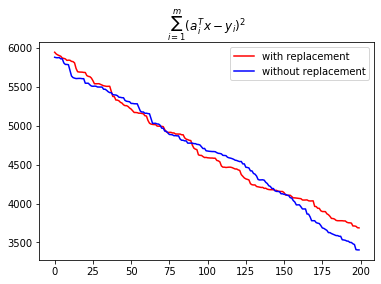

In [13]:
plt.plot(IGD_wr_task3(y,A)[1],color='red')
plt.plot(IGD_wo_task3(y,A)[1],color='blue')
plt.legend(['with replacement','without replacement'])
plt.title('$\sum_{i=1}^{m} (a^T_ix-y_i)^2$')
plt.show()


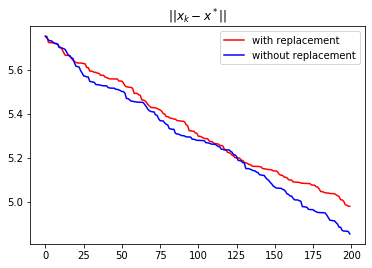

In [14]:
plt.plot(IGD_wr_task3(y,A)[2],color='red')
plt.plot(IGD_wo_task3(y,A)[2],color='blue')
plt.legend(['with replacement','without replacement'])
plt.title('$||x_k-x^*||$')
plt.show()

Without replacement usually better but repeated testing showed that it flips sometimes